In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity



In [27]:
data=pd.read_csv("C:/Users/cynth/Downloads/Data Science/Project 1/youtubers_df.csv") #loading the data
data.head() #seeing the structure of the data in a snippet form


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [28]:
data.info() #getting more information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [29]:
data.isnull().sum()  #checking for missing data which will be null as in  zero

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [41]:
data["Categories"].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

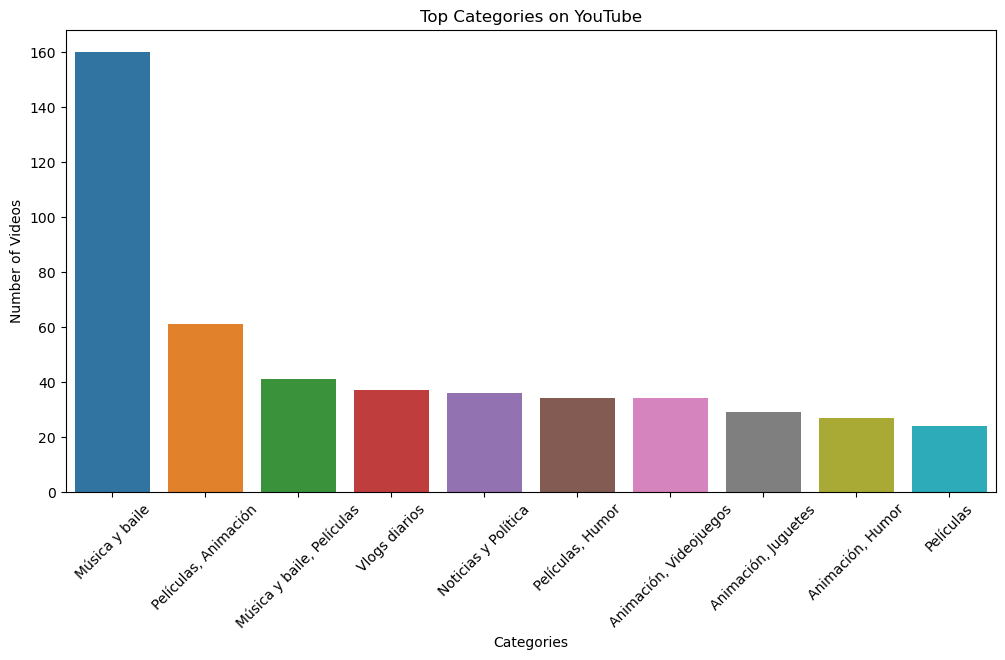

In [55]:
top_categories = data['Categories'].value_counts().nlargest(10)  #Top categories based on the number of videos

# Top categories based on the number of videos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Categories on YouTube')
plt.xlabel('Categories')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

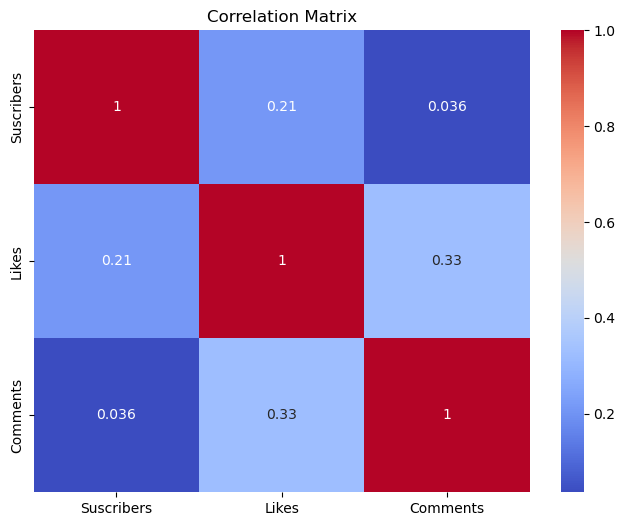

In [56]:


# Correlation between the number of subscribers and the number of likes or comments
correlation_matrix = data[['Suscribers', 'Likes', 'Comments']].corr() 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


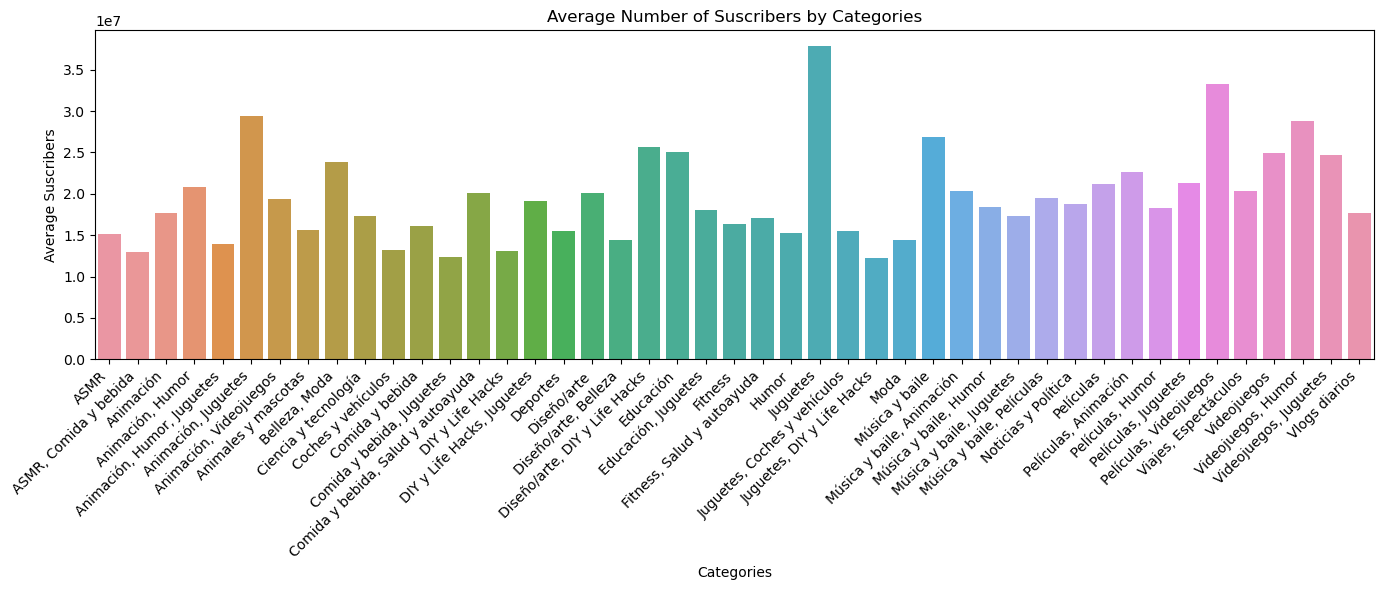

In [57]:

# Analyzing the distribution of streamers' audiences by country

plt.figure(figsize=(14, 6))
sns.barplot(x=average_metrics.index, y='Suscribers', data=average_metrics)
plt.title('Average Number of Suscribers by Categories')
plt.xlabel('Categories')
plt.ylabel('Average Suscribers')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation, alignment, and font size
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


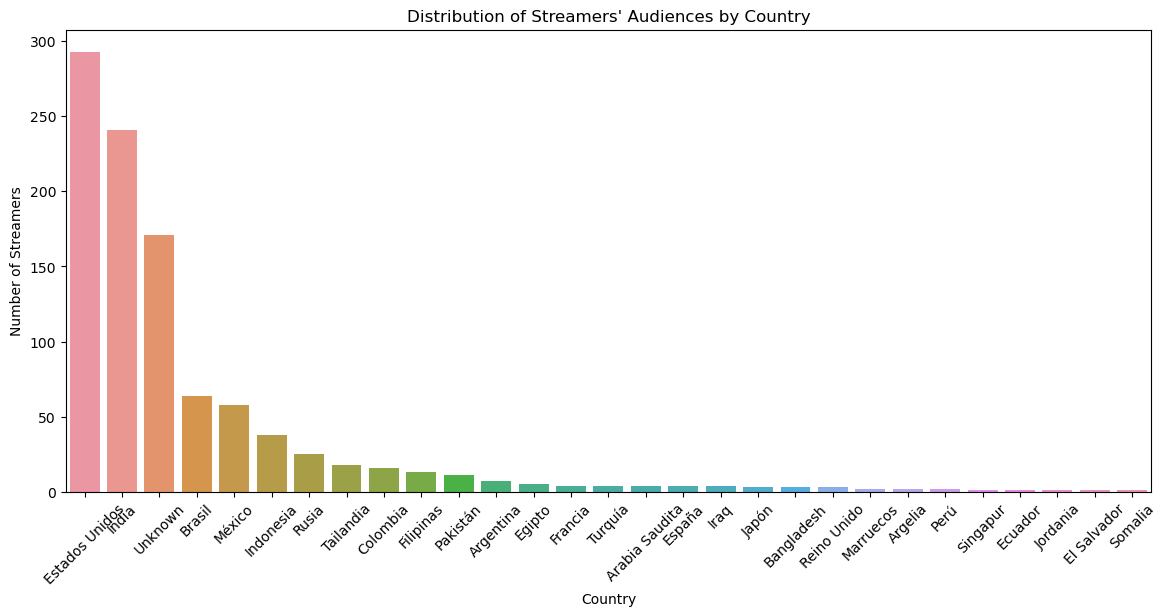

In [53]:
# Analyzing the distribution of streamers' audiences by country
plt.figure(figsize=(14, 6))
sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Distribution of Streamers\' Audiences by Country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show()


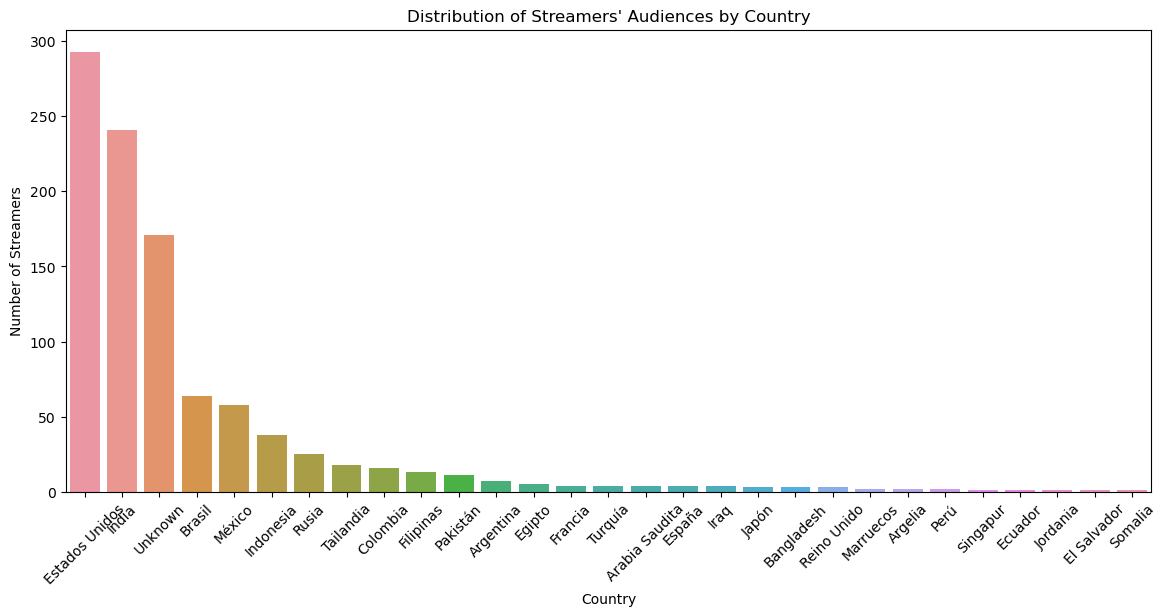

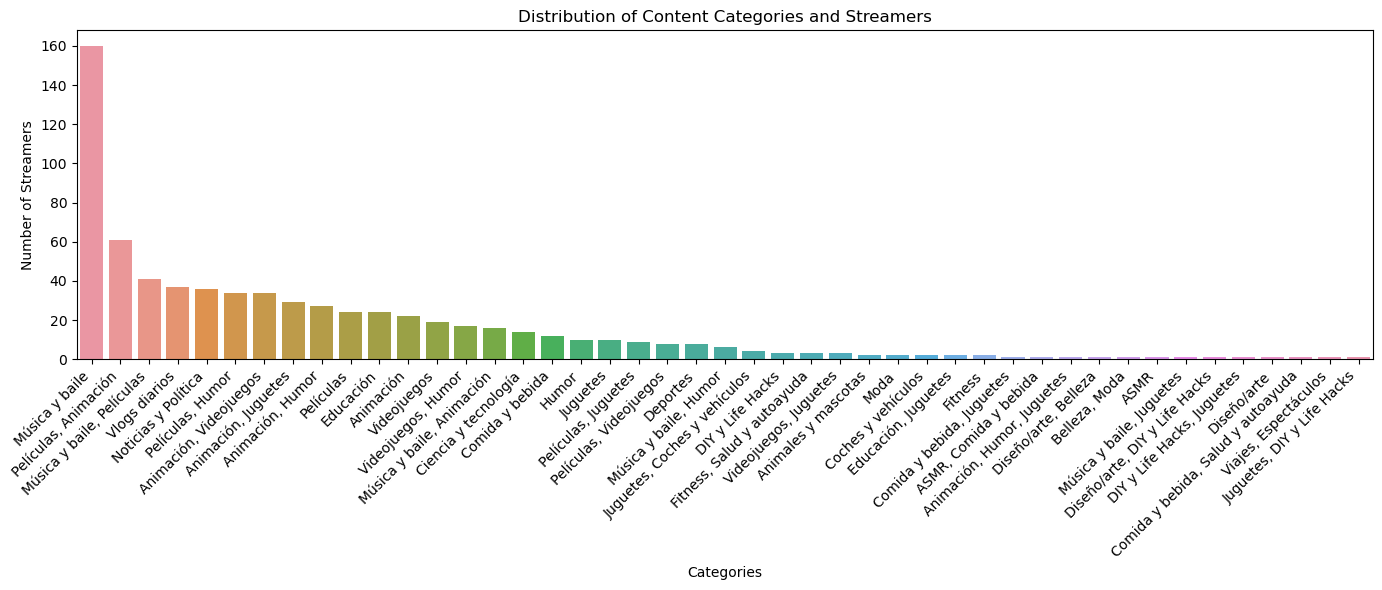

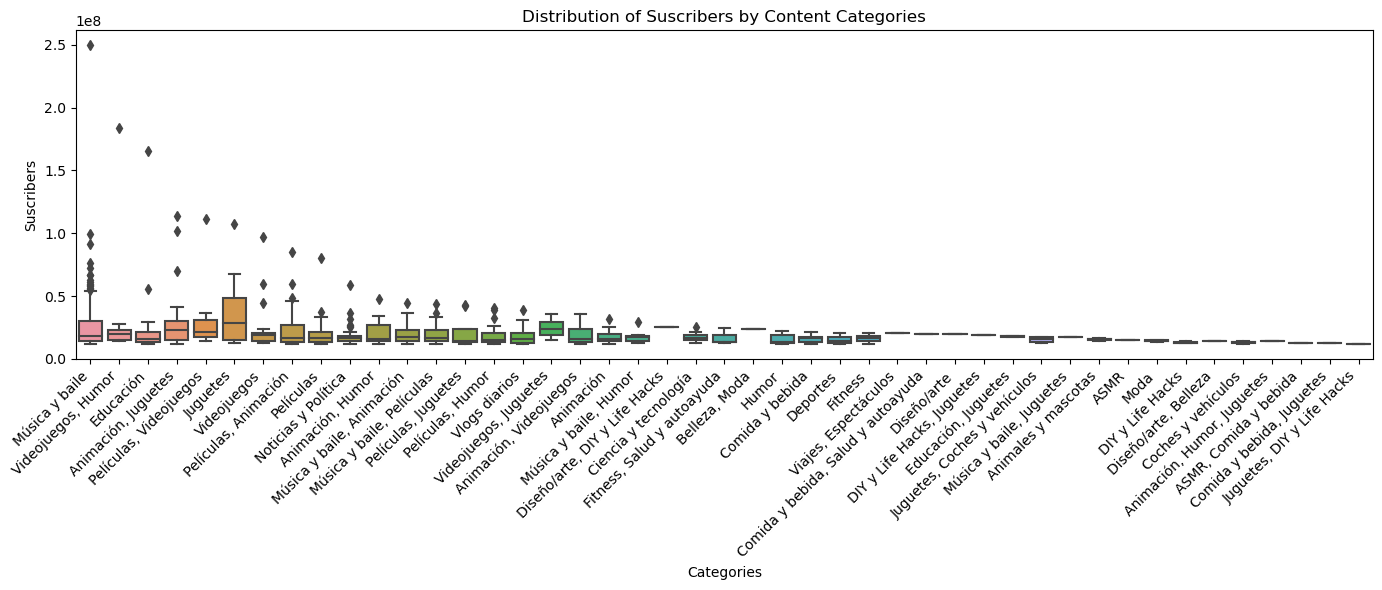

In [59]:
# Explore the distribution of content categories and streamers count
plt.figure(figsize=(14, 6))
sns.countplot(x='Categories', data=data, order=data['Categories'].value_counts().index)
plt.title('Distribution of Content Categories and Streamers')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation, alignment, and font size
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Explore exceptional performance metrics by category
plt.figure(figsize=(14, 6))
sns.boxplot(x='Categories', y='Suscribers', data=data)
plt.title('Distribution of Suscribers by Content Categories')
plt.xlabel('Categories')
plt.ylabel('Suscribers')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation, alignment, and font size
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [61]:
# Analyze brand collaborations and marketing campaigns
# Assuming 'BrandCollaborations' is a column indicating the number of brand collaborations
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Suscribers', y='BrandCollaborations', data=data)
plt.title('Brand Collaborations vs Suscribers')
plt.xlabel('Suscribers')
plt.ylabel('Brand Collaborations')
plt.show()


ValueError: Could not interpret value `BrandCollaborations` for parameter `y`

<Figure size 800x600 with 0 Axes>

In [63]:
# Identify top-performing content creators based on average performance metrics
top_performers = data[data[['Suscribers', 'Visits', 'Likes', 'Comments']].mean(axis=1) > data[['Suscribers', 'Visits', 'Likes', 'Comments']].mean().mean()]

# Display top-performing content creators
print("Top-performing content creators:")
print(top_performers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])


Top-performing content creators:
          Username   Suscribers       Visits      Likes  Comments
0          tseries  249500000.0      86200.0     2700.0      78.0
1          MrBeast  183500000.0  117400000.0  5300000.0   18500.0
2        CoComelon  165500000.0    7000000.0    24700.0       0.0
3         SETIndia  162600000.0      15600.0      166.0       9.0
4    KidsDianaShow  113500000.0    3900000.0    12400.0       0.0
..             ...          ...          ...        ...       ...
590        GoAmiGo   15400000.0    7900000.0   455300.0    2300.0
691    seungbini67   14300000.0    9200000.0   325200.0    2000.0
734        Mythpat   13900000.0   11700000.0  1200000.0   15800.0
805        NickPro   13200000.0   12200000.0   286000.0     245.0
958        dojacat   11900000.0   13600000.0   395300.0   73000.0

[313 rows x 5 columns]
